# Netflix Content Recommendation Analysis
Team members:

Eric Gonsalves,Yuxuan Liu,Abimbola Sowemimo,Rohana Ravindra Survase,Fung Sang Kety Tai,Yuejia Zhang

## Introduction

In a collaborative effort, the team analyzed several key questions pivotal to enhancing userexperience on the Netflix platform:1. How can Netflix offer content recommendations similar to the "you may also like"function found in many online shopping platforms?2. What are the common keywords or phrases in content descriptions that resonate mostwith viewers?3. Which countries have shown the highest demand for Netflix content, and what genresare they predominantly inclined towards?4. Is there a pattern or trend in how Netflix has been adding content over the years?5. Can predictive models forecast ratings and categorizations based on description content?6. Clustering based on Movie/TV-Show description?

## Loading Dataset

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sb

In [ ]:
#To upload from our local drives
from google.colab import files
uploaded = files.upload()
#Reference: https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92#:~:text=Click%20on%20the%20dataset%20in,read_csv%20to%20get%20the%20dataframe.

In [ ]:
#Import the dataset into a dataframe
import io
NF_Data = pd.read_csv(io.BytesIO(uploaded['netflix_titles.csv']))
# Dataset is now stored in a Pandas Dataframe

In [ ]:
#Additional way to load the dataset
from pandas.io.parsers.readers import read_csv
NF_Data = read_csv('/content/netflix_titles.csv')


## EDA

In [ ]:
NF_Data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
# An overview of the dataset
print(NF_Data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
None


In [ ]:
# How many entries are in the dataset?
print(f"Shape of the dataset: {NF_Data.shape}")
# output: (8807, 12)
# Was there missing data? Duplications? How clean was the data?
#     Check for missing values in each column and print the null numbers;
for column in NF_Data.columns:
    missingCount = NF_Data[column].isnull().sum()
    if missingCount > 0:
        print(f"Missing values in {column}: {missingCount}")
#     Check for duplication
print(f"Duplication of the dataset: {NF_Data.duplicated().sum()}")
# Reference: https://www.kaggle.com/code/naeimehnourr/net-ix-movies-recommendation-system-6-models

Shape of the dataset: (8807, 12)
Missing values in director: 2634
Missing values in cast: 825
Missing values in country: 831
Missing values in date_added: 10
Missing values in rating: 4
Missing values in duration: 3
Duplication of the dataset: 0


In [ ]:
#What did you do to clean the data?
#Check data consistency
#type
print(NF_Data['type'].unique(),
#rating
NF_Data['rating'].unique())

['Movie' 'TV Show'] ['PG-13' 'TV-MA' 'PG' 'TV-14' 'TV-PG' 'TV-Y' 'TV-Y7' 'R' 'TV-G' 'G'
 'NC-17' '74 min' '84 min' '66 min' 'NR' nan 'TV-Y7-FV' 'UR']


In [ ]:
#Change 'UR' to 'NR'
for i in range(len(NF_Data)):
    if NF_Data['rating'].iloc[i] == "UR":
        NF_Data['rating'].iloc[i] = "NR"

<ipython-input-8-9950026dfc85>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NF_Data['rating'].iloc[i] = "NR"


In [ ]:
#Move the length values to the column 'duration'
duration_index = NF_Data[NF_Data['rating'].isin(['74 min', '84 min', '66 min'])].index.tolist()

for i in duration_index:
    split_value = NF_Data['rating'].iloc[i].split(" ")
    length = split_value[0]
    NF_Data['duration'].iloc[i] = length
    NF_Data['rating'].iloc[i] = "NR"

<ipython-input-9-23132e76f39b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NF_Data['duration'].iloc[i] = length
<ipython-input-9-23132e76f39b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NF_Data['rating'].iloc[i] = "NR"


In [ ]:
#Check dataset after cleaning

NF_Data['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', 'NR', nan, 'TV-Y7-FV'], dtype=object)

In [ ]:
NF_Data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


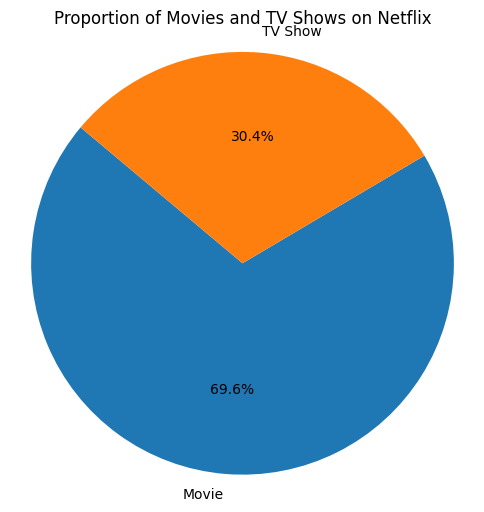

In [ ]:
#1.What did you do in the context of Data Exploration?
import matplotlib.pyplot as plt

# Count the number of Movies and TV Shows
type_counts = NF_Data['type'].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Movies and TV Shows on Netflix')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the pie chart
plt.show()

In [ ]:
import plotly.express as px

# Assuming you have already defined my_df and mydf_TV

fig = px.histogram(NF_Data, x='rating', nbins=len(NF_Data['rating'].unique()))

fig.update_layout(
    template='plotly_white',
    xaxis_title='Age Rating',
    yaxis_title='Count',
)

fig.show()

In [ ]:
import plotly.graph_objects as go

# Assuming you have already defined my_df

mydf_country = NF_Data['country'].value_counts().reset_index()[:15]
mydf_country = mydf_country[mydf_country['index'] != 'UnKnown']

trace1 = go.Bar(
    x=mydf_country['index'],
    y=mydf_country['country'],
    marker=dict(color='rgb(243,212,105)', line=dict(color='rgb(243,212,105)', width=1.5))
)

layout = go.Layout(
    template="plotly_white",
    title='TOP COUNTRIES WITH THE HIGHEST NUMBER OF CONTENT',
    xaxis=dict(title='Countries'),
    yaxis=dict(title='Count')
)

fig = go.Figure(data=[trace1], layout=layout)
fig.show()

## Q1. Recommendations based on the one customer selected, like the “you may also like” function in online shopping.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity

# Create Bag of Words
NF_Data['bag_of_words'] = NF_Data['title'].fillna('') + ' ' + \
                          NF_Data['director'].fillna('') + ' ' + \
                          NF_Data['cast'].fillna('') + ' ' + \
                          NF_Data['country'].fillna('') + ' ' + \
                          NF_Data['listed_in'].fillna('') + ' ' + \
                          NF_Data['description'].fillna('')

#Vectorize
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(NF_Data['bag_of_words'])


In [ ]:
# Determine the optimal number of clusters using the Elbow method
import matplotlib.pyplot as plt

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10,5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [ ]:
#Fit kmeans using k = 4
kmeans = KMeans(n_clusters=4, init='k-means++', n_init=10)

NF_Data['cluster'] = kmeans.fit_predict(X)

In [ ]:
#Check the result
NF_Data.cluster.value_counts()

In [ ]:
#Function for recommendation
def recommend(title):
    # Find the cluster of the target item
    cluster_num = NF_Data[NF_Data['title'] == title]['cluster'].values[0]

    # Filter the data to only include items from the same cluster
    cluster_data = NF_Data[NF_Data['cluster'] == cluster_num]

    # Calculate cosine similarities within the same cluster
    cluster_matrix = X[cluster_data.index]

    global_index = NF_Data.index[NF_Data['title'] == title].tolist()[0]

    # Find the relative index of the title within the cluster_data
    relative_index = cluster_data.index.get_loc(global_index)

    cosine_similarities = cosine_similarity(cluster_matrix, cluster_matrix[relative_index].reshape(1, -1))

    # Flatten the cosine similarities and remove the index of the target item
    cosine_similarities = cosine_similarities.flatten()
    cosine_similarities = np.delete(cosine_similarities, relative_index)

    # Get top 5 most similar items
    similar_items = sorted(range(len(cosine_similarities)), key=lambda i: cosine_similarities[i], reverse=True)[:5]

    # Return titles of the recommended items
    recommended_titles = cluster_data.iloc[similar_items]['title'].values
    return recommended_titles


In [ ]:
#Test the model with the movie "Ocean's Twelve"
def get_info(title):
    return NF_Data[NF_Data['title'] == title]

get_info("Ocean's Twelve")

In [ ]:
pd.concat([get_info(t) for t in recommend("Ocean's Twelve")])

In [ ]:
#Test the model with the TV show "Ganglands"
get_info("Ganglands")

In [ ]:
pd.concat([get_info(t) for t in recommend("Ganglands")])

## Q2. Can you identify common keywords or phrases in content descriptions that attract viewers?

1. life (TF-IDF Score: 112.98053626875962)
2. young (TF-IDF Score: 104.49586218553924)
3. new (TF-IDF Score: 98.06107585752697)
4. family (TF-IDF Score: 93.2594848501179)
5. man (TF-IDF Score: 84.56240933153558)
6. world (TF-IDF Score: 83.66612776631037)
7. woman (TF-IDF Score: 79.3707733865323)
8. love (TF-IDF Score: 79.05652256233401)
9. friends (TF-IDF Score: 72.2044449528819)
10. series (TF-IDF Score: 64.18580040846612)


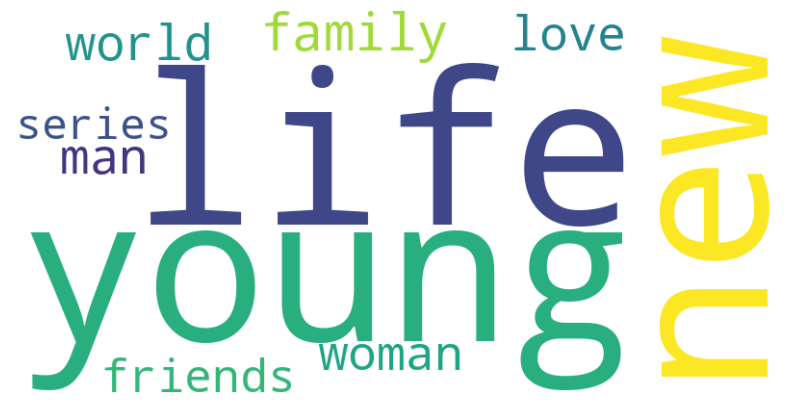

In [ ]:

# !pip install wordcloud
# from wordcloud import WordCloud
# import matplotlib.pyplot as plt



# import spacy

# # Load the spaCy language model
# nlp = spacy.load('en_core_web_sm')

# # Access the 'description' column in your dataset
# descriptions = NF_Data['description']

# # Function to extract keywords and phrases
# def extract_keywords(text, num_keywords=10):
#     doc = nlp(text)
#     keywords = [token.text for token in doc if not token.is_stop and not token.is_punct and not token.is_space and len(token.text) > 2]
#     return keywords[:num_keywords]

# # List to store all keywords from the dataset
# all_keywords = []

# # Extract keywords for each description
# for description in descriptions:
#     keywords = extract_keywords(description)
#     all_keywords.extend(keywords)

# # Count the frequency of each keyword
# keyword_frequency = {}
# for keyword in all_keywords:
#     keyword_frequency[keyword] = keyword_frequency.get(keyword, 0) + 1

# # Sort keywords by frequency in descending order
# sorted_keywords = sorted(keyword_frequency.items(), key=lambda x: x[1], reverse=True)

# # Extract the top 10 keywords that attract viewers
# top_n = 10
# if len(sorted_keywords) > 0:
#     top_keywords = sorted_keywords[:top_n]
#     print(f"Top {top_n} keywords that attract viewers:")
#     for i, (keyword, frequency) in enumerate(top_keywords):
#         print(f"{i+1}. {keyword} (Frequency: {frequency})")
# else:
#     print("There are no keywords that attract viewers in the dataset.")





from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(descriptions)

feature_names = tfidf_vectorizer.get_feature_names_out()
sorted_items = sorted(list(zip(feature_names, tfidf_matrix.sum(0).tolist()[0])), key=lambda x: x[1], reverse=True)
top_keywords = sorted_items[:top_n]

for i, (keyword, score) in enumerate(top_keywords):
    print(f"{i + 1}. {keyword} (TF-IDF Score: {score})")



## Q3. Regional Content Preferences: Which countries have the highest demand for our content, and what genres are most popular in those regions?

In [ ]:
NF_Data['country'] = NF_Data['country'].fillna(NF_Data['country'].mode()[0])
NF_Data['country'] = NF_Data['country'].astype(str)
NF_Data['country'] = NF_Data['country'].apply(lambda x : x.split(', ')[0])
NF_Data['country'].value_counts()


In [ ]:
ig, ax = plt.subplots(figsize=(50, 20))
y = sns.countplot(y='country',
            data=NF_Data,palette='crest_r', order =NF_Data['country'].value_counts().index[:15])

plt.tick_params(labelsize=50)
plt.show()

Clean rating colum
**bold text**

In [ ]:
country_counts = NF_Data['country'].value_counts()
highest_demand_country = country_counts.idxmax()
highest_demand_count = country_counts.max()

print(f"The country with the highest demand for Netflix content is {highest_demand_country} with {highest_demand_count} titles available.")


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming NF_Data is your DataFrame

# Group by 'type' (genre) and count the occurrences in the specified country (e.g., 'United States')
genre_counts = NF_Data[NF_Data['country'] == 'United States']['type'].value_counts().reset_index()

# Rename the columns for clarity
genre_counts.columns = ['Genre', 'Count']

# Create the barplot
fig, ax = plt.subplots(figsize=(15, 8))
sns.barplot(x='Genre', y='Count', data=genre_counts, palette='crest_r')
plt.xlabel('Genre', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.title('Most Popular Genres in the United States', fontsize=18)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.show()
print(genre_counts)


## Q4. How Netflix has been adding content over the years. Are they consistent, or are there specific years where more content was added?

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Convert the 'date_added' column to datetime format
NF_Data['date_added'] = pd.to_datetime(NF_Data['date_added'], errors='coerce')

# Extract the year from 'date_added' and create a new column 'year_added'
NF_Data['year_added'] = NF_Data['date_added'].dt.year

# Count the number of titles added each year
yearly_content_addition = NF_Data['year_added'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(14, 7))
yearly_content_addition.plot(kind='bar', color='coral')
plt.title("Content Addition Trend on Netflix")
plt.xlabel("Year")
plt.ylabel("Number of Titles Added")
plt.grid(axis='y')

plt.show()

## Q5. Can we predict the rating & listed_in assignment based on the keywords (adjective & noun) in the description content?

In [ ]:
import pandas as pd
import nltk
from nltk import word_tokenize, pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder


In [ ]:
# import nltk
# nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# Preprocess the text data in the description column
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
# Define a set of English stopwords:
stop_words = set(stopwords.words("english"))
#Create a WordNet lemmatizer instance:
lemmatizer = WordNetLemmatizer()

# Preprocess the text data in the 'description' column
def preprocess_text(text):
    words = word_tokenize(text) # Tokenize the text into words;
    # Lemmatize, convert to lowercase, and remove stopwords:
    words = [lemmatizer.lemmatize(word.lower()) for word in words if word.isalpha() and word not in stop_words]
    return " ".join(words) # Join the processed words back into a cleaned text;

## Apply the preprocessing function to the 'description' column
#and create a new 'cleaned_description' column;
NF_Data['cleaned_description'] = NF_Data['description'].apply(preprocess_text)

# Extract adjectives from the cleaned description
def extract_adjectives(text):
    words = word_tokenize(text) # Tokenize the cleaned text into words;
    # Perform part-of-speech tagging to identify adjectives:
    tagged_words = pos_tag(words)
    # Select words with POS tags ['JJ', 'JJR', 'JJS'] (adjectives):
    adjectives = [word for word, pos in tagged_words if pos in ['JJ', 'JJR', 'JJS']]
    # Join the extracted adjectives into a space-separated string:
    return " ".join(adjectives)

## Apply the adjective extraction function and create an 'adjectives' column;
NF_Data['adjectives'] = NF_Data['cleaned_description'].apply(extract_adjectives)

# Extract nouns from the cleaned description
def extract_nouns(text):
    words = word_tokenize(text)
    # Perform part-of-speech tagging to identify nouns:
    tagged_words = pos_tag(words)
    # Select words with POS tags ['NN', 'NNS', 'NNP', 'NNPS'] (nouns):
    nouns = [word for word, pos in tagged_words if pos in ['NN', 'NNS', 'NNP', 'NNPS']]
    return " ".join(nouns)

## Apply the noun extraction function and create a 'nouns' column:
NF_Data['nouns'] = NF_Data['cleaned_description'].apply(extract_nouns)

#references:
# https://www.machinelearningplus.com/nlp/lemmatization-examples-python/
# https://www.guru99.com/pos-tagging-chunking-nltk.html

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
NF_Data['nouns'].head(), NF_Data['adjectives'].head()

(0    father life filmmaker kirsten johnson stage de...
 1               path party cape town star sister birth
 2    family drug lord thief mehdi expert team viole...
 3    feud flirtation toilet talk woman justice cent...
 4    city coaching center collegiate mind student f...
 Name: nouns, dtype: object,
 0      end inventive comical inevitable
 1                                  teen
 2                  powerful pulled turf
 3               incarcerated new gritty
 4    india finest earnest unexceptional
 Name: adjectives, dtype: object)

In [ ]:
# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Encode the 'rating' column and create 'encoded_rating'
NF_Data['encoded_rating'] = label_encoder.fit_transform(NF_Data['rating'])

# Encode the 'listed_in' column and create 'encoded_listed_in'
NF_Data['encoded_listed_in'] = label_encoder.fit_transform(NF_Data['listed_in'])

### 1. can we predict the rating assigning based on adjective words in description content?

In [ ]:
# TF-IDF vectorization of adjective words
tfidf_vectorizer = TfidfVectorizer()
X = tfidf_vectorizer.fit_transform(NF_Data['adjectives'])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, NF_Data['encoded_rating'], test_size=0.33, random_state=42)

# Train a RandomForest classifier to predict 'rating'
clf_rating = RandomForestClassifier(n_estimators=100, random_state=42)
clf_rating.fit(X_train, y_train)

# Predict 'rating' on the test set
y_pred = clf_rating.predict(X_test)

# Decode the predicted labels
y_pred_decoded = label_encoder.inverse_transform(y_pred)

# Calculate accuracy for the prediction
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)
f1 = f1_score(y_test, y_pred, average='weighted')

# Calculate the confusion matrix
confusionMatrix = confusion_matrix(y_test, y_pred)

# Print the evaluation metrics
print(f'Accuracy for predicting "rating" based on Adjectives: {accuracy:.2f}')
print(f'Precision for predicting "rating" based on Adjectives: {precision:.2f}')
print(f'Recall for predicting "rating" based on Adjectives: {recall:.2f}')
print(f'F1 Score for predicting "rating" based on Adjectives: {f1:.2f}')
print('Confusion Matrix:')
print(confusionMatrix)

# references:
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html

Accuracy for predicting "rating" based on Adjectives: 0.34
Precision for predicting "rating" based on Adjectives: 0.27
Recall for predicting "rating" based on Adjectives: 0.34
F1 Score for predicting "rating" based on Adjectives: 0.28
Confusion Matrix:
[[  0   0   1   1   0   3   0  13   0   0   1   0]
 [  0   0   0   1   1   2   0  15   1   1   1   0]
 [  0   0   1   2   4  33   0  60   1   3   3   0]
 [  0   0   0   1   9  50   1  84   3   3   3   0]
 [  0   2   4   6  19  82   1 160   2   0   2   0]
 [  0   2   2  10  19 229   2 393  26   6   8   0]
 [  0   0   0   1   2  19   2  43   3   1   4   0]
 [  0   0   3  15  30 291   1 674  21   8  13   0]
 [  0   0   1   2   8 108   3 141  12   9   4   0]
 [  2   0   1   1   3  27   1  36   6  20   5   0]
 [  0   0   0   0   5  29   2  45   3   6  16   0]
 [  0   0   0   0   0   1   0   0   0   0   2   0]]


### 2. can we predict the rating assigning based on the nouns in description content?

In [ ]:
# TF-IDF vectorization of noun words
tfidf_vectorizer = TfidfVectorizer()
X = tfidf_vectorizer.fit_transform(NF_Data['nouns'])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, NF_Data['encoded_rating'], test_size=0.33, random_state=42)

# Train a RandomForest classifier to predict 'rating'
clf_rating = RandomForestClassifier(n_estimators=100, random_state=42)
clf_rating.fit(X_train, y_train)

# Predict 'rating' on the test set
y_pred = clf_rating.predict(X_test)

# Decode the predicted labels
y_pred_decoded = label_encoder.inverse_transform(y_pred)

# Calculate accuracy for the prediction
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)
f1 = f1_score(y_test, y_pred, average='weighted')

# Calculate the confusion matrix
confusionMatrix = confusion_matrix(y_test, y_pred)

# Print the evaluation metrics
print(f'Accuracy for predicting "rating" based on nouns: {accuracy:.2f}')
print(f'Precision for predicting "rating" based on nouns: {precision:.2f}')
print(f'Recall for predicting "rating" based on nouns: {recall:.2f}')
print(f'F1 Score for predicting "rating" based on nouns: {f1:.2f}')
print('Confusion Matrix:')
print(confusionMatrix)

# reference: https://stackoverflow.com/questions/62326735/metrics-f1-warning-zero-division

Accuracy for predicting "rating" based on nouns: 0.38
Precision for predicting "rating" based on nouns: 0.39
Recall for predicting "rating" based on nouns: 0.38
F1 Score for predicting "rating" based on nouns: 0.30
Confusion Matrix:
[[  0   0   0   0   1   5   0   9   2   0   2   0]
 [  0   0   0   0   0   2   0  19   1   0   0   0]
 [  0   0   0   0   0  18   1  78   5   1   4   0]
 [  0   0   0   3   1  36   0 106   5   0   3   0]
 [  0   0   0   0   9  40   0 220   2   1   6   0]
 [  0   0   0   0   3 172   0 494  15   4   9   0]
 [  0   0   0   0   0  11   0  51   8   2   3   0]
 [  0   0   0   1   5 165   0 854  14   5  12   0]
 [  0   0   0   0   0  58   0 205  14   3   8   0]
 [  0   0   0   1   1   5   0  58   4  24   9   0]
 [  0   0   0   1   1  12   0  58   4   5  25   0]
 [  0   0   0   0   0   1   0   2   0   0   0   0]]


### 3. can we predict the listed_in assigning based on the adjective in description content?

In [ ]:
# TF-IDF vectorization of adjective words
tfidf_vectorizer = TfidfVectorizer()
X = tfidf_vectorizer.fit_transform(NF_Data['adjectives'])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, NF_Data['encoded_listed_in'], test_size=0.33, random_state=42)

# Train a RandomForest classifier to predict 'listed_in'
clf_listed_in = RandomForestClassifier(n_estimators=100, random_state=42)
clf_listed_in.fit(X_train, y_train)

# Predict 'listed_in' on the test set
y_pred = clf_listed_in.predict(X_test)

# Decode the predicted labels
y_pred_decoded = label_encoder.inverse_transform(y_pred)

# Calculate accuracy for the prediction
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)
f1 = f1_score(y_test, y_pred, average='weighted')

# Calculate the confusion matrix
confusionMatrix = confusion_matrix(y_test, y_pred)

# Print the evaluation metrics
print(f'Accuracy for predicting "listed_in" based on Adjectives: {accuracy:.2f}')
print(f'Precision for predicting "listed_in" based on Adjectives: {precision:.2f}')
print(f'Recall for predicting "listed_in" based on Adjectives: {recall:.2f}')
print(f'F1 Score for predicting "listed_in" based on Adjectives: {f1:.2f}')
print('Confusion Matrix:')
print(confusionMatrix)

#reference: https://stackoverflow.com/questions/62326735/metrics-f1-warning-zero-division

Accuracy for predicting "listed_in" based on Adjectives: 0.08
Precision for predicting "listed_in" based on Adjectives: 0.16
Recall for predicting "listed_in" based on Adjectives: 0.08
F1 Score for predicting "listed_in" based on Adjectives: 0.07
Confusion Matrix:
[[5 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


### 4. can we predict the listed_in assigning based on the nouns in description content?

In [ ]:
# TF-IDF vectorization of noun words
tfidf_vectorizer = TfidfVectorizer()
X = tfidf_vectorizer.fit_transform(NF_Data['nouns'])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, NF_Data['encoded_listed_in'], test_size=0.33, random_state=42)

# Train a RandomForest classifier to predict 'listed_in'
clf_listed_in = RandomForestClassifier(n_estimators=100, random_state=42)
clf_listed_in.fit(X_train, y_train)

# Predict 'listed_in' on the test set
y_pred = clf_listed_in.predict(X_test)

# Decode the predicted labels
y_pred_decoded = label_encoder.inverse_transform(y_pred)

# Calculate accuracy for the prediction
accuracy = accuracy_score(y_test, y_pred)

# Calculate accuracy for the prediction
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)
f1 = f1_score(y_test, y_pred, average='weighted')

# Calculate the confusion matrix
confusionMatrix = confusion_matrix(y_test, y_pred)

# Print the evaluation metrics
print(f'Accuracy for predicting "listed_in" based on nouns: {accuracy:.2f}')
print(f'Precision for predicting "listed_in" based on nouns: {precision:.2f}')
print(f'Recall for predicting "listed_in" based on nouns: {recall:.2f}')
print(f'F1 Score for predicting "listed_in" based on nouns: {f1:.2f}')
print('Confusion Matrix:')
print(confusionMatrix)

# reference: https://stackoverflow.com/questions/62326735/metrics-f1-warning-zero-division

Accuracy for predicting "listed_in" based on nouns: 0.13
Precision for predicting "listed_in" based on nouns: 0.26
Recall for predicting "listed_in" based on nouns: 0.13
F1 Score for predicting "listed_in" based on nouns: 0.11
Confusion Matrix:
[[9 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [2 0 0 ... 0 0 0]]


### Generally speaking, models performance for predicting "listed_in" & "rating" based on adjectives & nouns are quite poor.

## Q6. Clustering on description?

In [ ]:
NF_Data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:

# Step 3: Data preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [ ]:
documents = NF_Data['description'].values.astype("U")

In [ ]:
vectorizer = TfidfVectorizer(stop_words='english')
features = vectorizer.fit_transform(documents)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


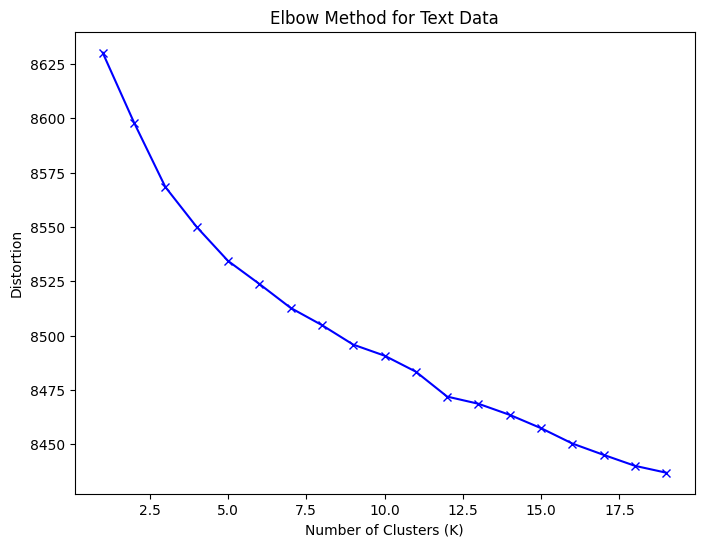

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt  # Add this import for plotting
import numpy as np

# Convert the text data to TF-IDF vectors
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(documents)

# Determine the optimal number of clusters using the elbow method
distortions = []
K = range(1, 20)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(tfidf_matrix)
    distortions.append(kmeanModel.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(K, distortions, 'bx-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Distortion')
plt.title('Elbow Method for Text Data')
plt.show()

In [ ]:
k = 6
model = KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=1)
model.fit(features)

NF_Data['cluster'] = model.labels_


In [ ]:
NF_Data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,cluster
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",1
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",4
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,4
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",1
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,5


In [ ]:
# output the result to a text file.

clusters = NF_Data.groupby('cluster')

for cluster in clusters.groups:
    with open('cluster' + str(cluster) + '.csv', 'w') as f:
        data = clusters.get_group(cluster)[['title', 'description']]
        f.write(data.to_csv(index_label='id'))

print("Cluster centroids:\n")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()  # Use get_feature_names_out() to get feature names

for i in range(k):
    print("Cluster %d:" % i)
    for j in order_centroids[i, :10]:
        print(' %s' % terms[j])
    print('------------')

Cluster centroids:

Cluster 0:
 world
 war
 ii
 new
 documentary
 life
 series
 save
 way
 high
------------
Cluster 1:
 life
 new
 love
 series
 school
 young
 high
 lives
 group
 home
------------
Cluster 2:
 family
 documentary
 old
 takes
 year
 life
 new
 follows
 series
 home
------------
Cluster 3:
 woman
 man
 young
 life
 love
 father
 finds
 falls
 son
 mother
------------
Cluster 4:
 star
 drug
 cop
 life
 lord
 new
 ex
 crime
 dealer
 police
------------
Cluster 5:
 friends
 best
 new
 love
 help
 school
 group
 life
 fun
 family
------------
